# This notebook is my work on "House Prices: Advanced Regression Techniques" competition from kaggle.com

In [1]:
# imports for data visualization and preprocessing
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")

In [2]:
# reading the data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

## So the plan is visualize and preprocess data from train set and do same preprocessing to test set. Then train different machine learning models on training test, pick the best two (competition uses Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price as evaluation so that's what I'm going to us as well), try to tune them a bit hoping to get a better score, use the best one on test set and submit the result

### First, general info about our datasets

In [3]:
# let's check out our datasets
print(f"Train dataset has {train.shape[0]} rows and {train.shape[1]} columns")
print(f"Test dataset has {test.shape[0]} rows and {test.shape[1]} columns")

Train dataset has 1460 rows and 81 columns
Test dataset has 1459 rows and 80 columns


In [4]:
# general description
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [6]:
# data types
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [7]:
# percentage of values missing
nan_values_train = (train.isnull().sum()/len(train))*100
nan_values_test = (test.isnull().sum()/len(test))*100

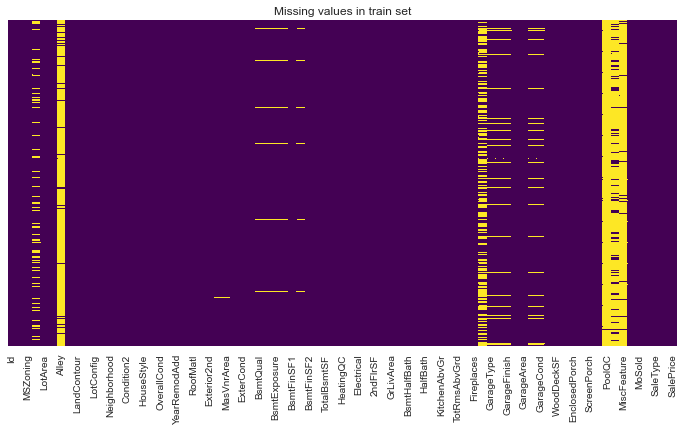

In [8]:
# visualizing train missing values
plt.figure(figsize = (12,6))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap="viridis")
plt.title("Missing values in train set");

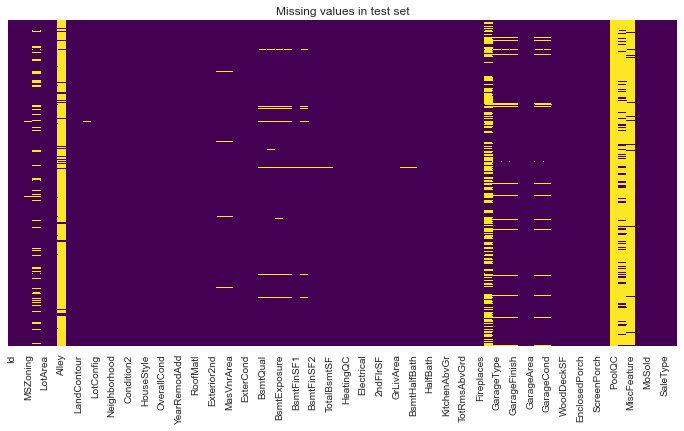

In [9]:
# visualizing test missing values
plt.figure(figsize = (12,6))
sns.heatmap(test.isnull(), yticklabels=False, cbar=False, cmap="viridis")
plt.title("Missing values in test set");

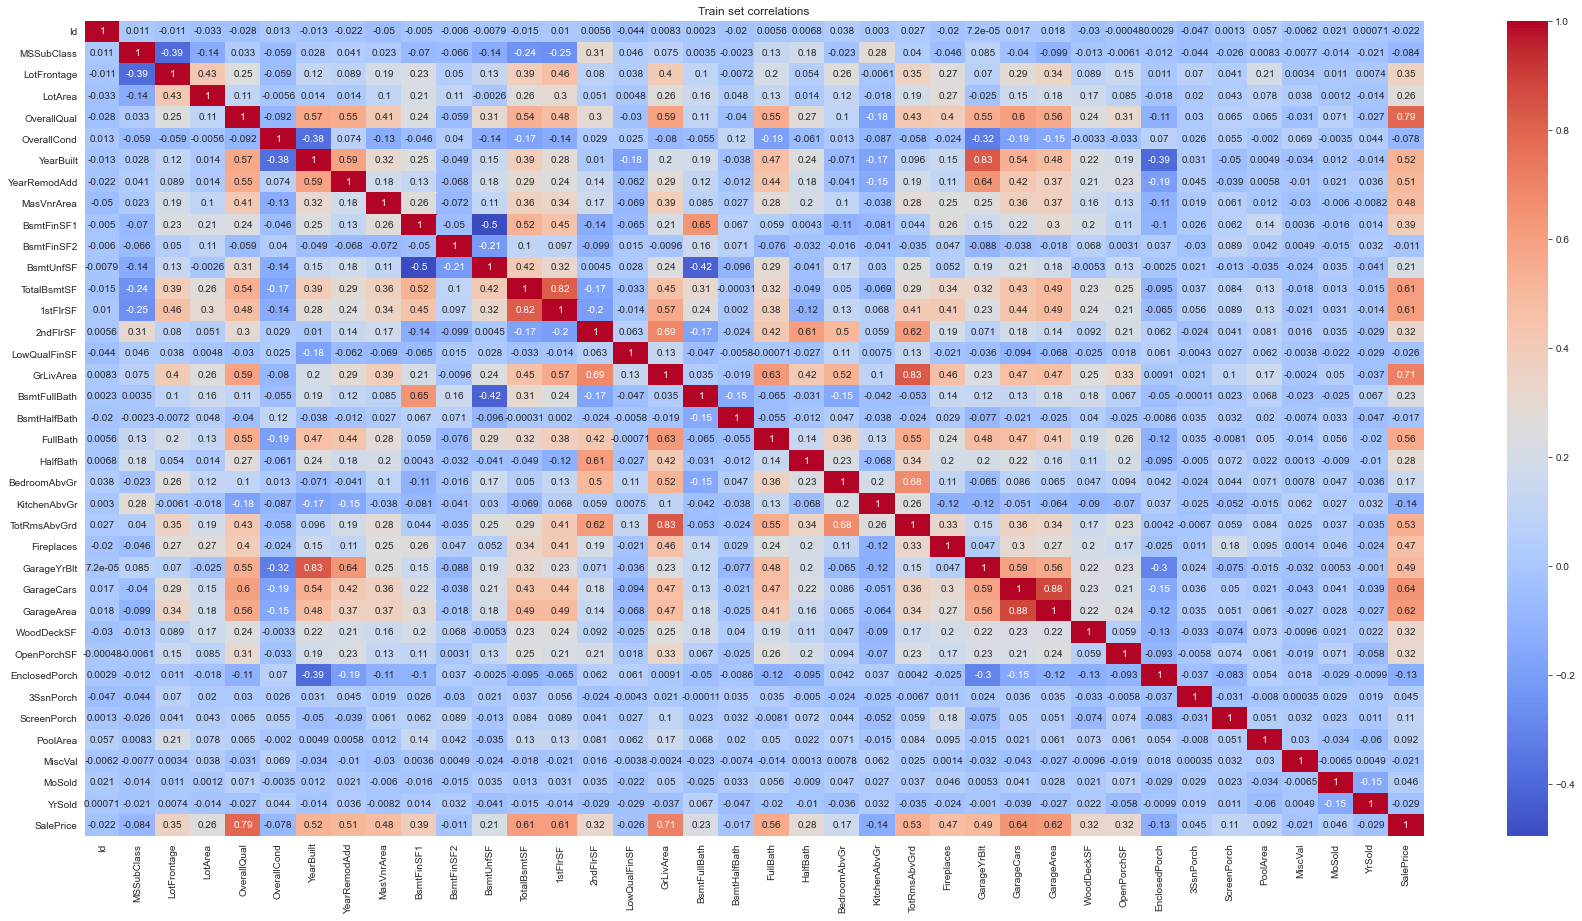

In [10]:
# correlations
correlations = train.corr()

# visualize correlations
plt.figure(figsize = (30,15))
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.title("Train set correlations");

In [11]:
# basically, we're interested how features are correlated to "SalePrice" column so let's put it into dataframe
# and have a look which features are more correlated with our target
correlation = correlations["SalePrice"].sort_values(ascending=False)
most_corr = correlation.index[:10]
most_corr

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

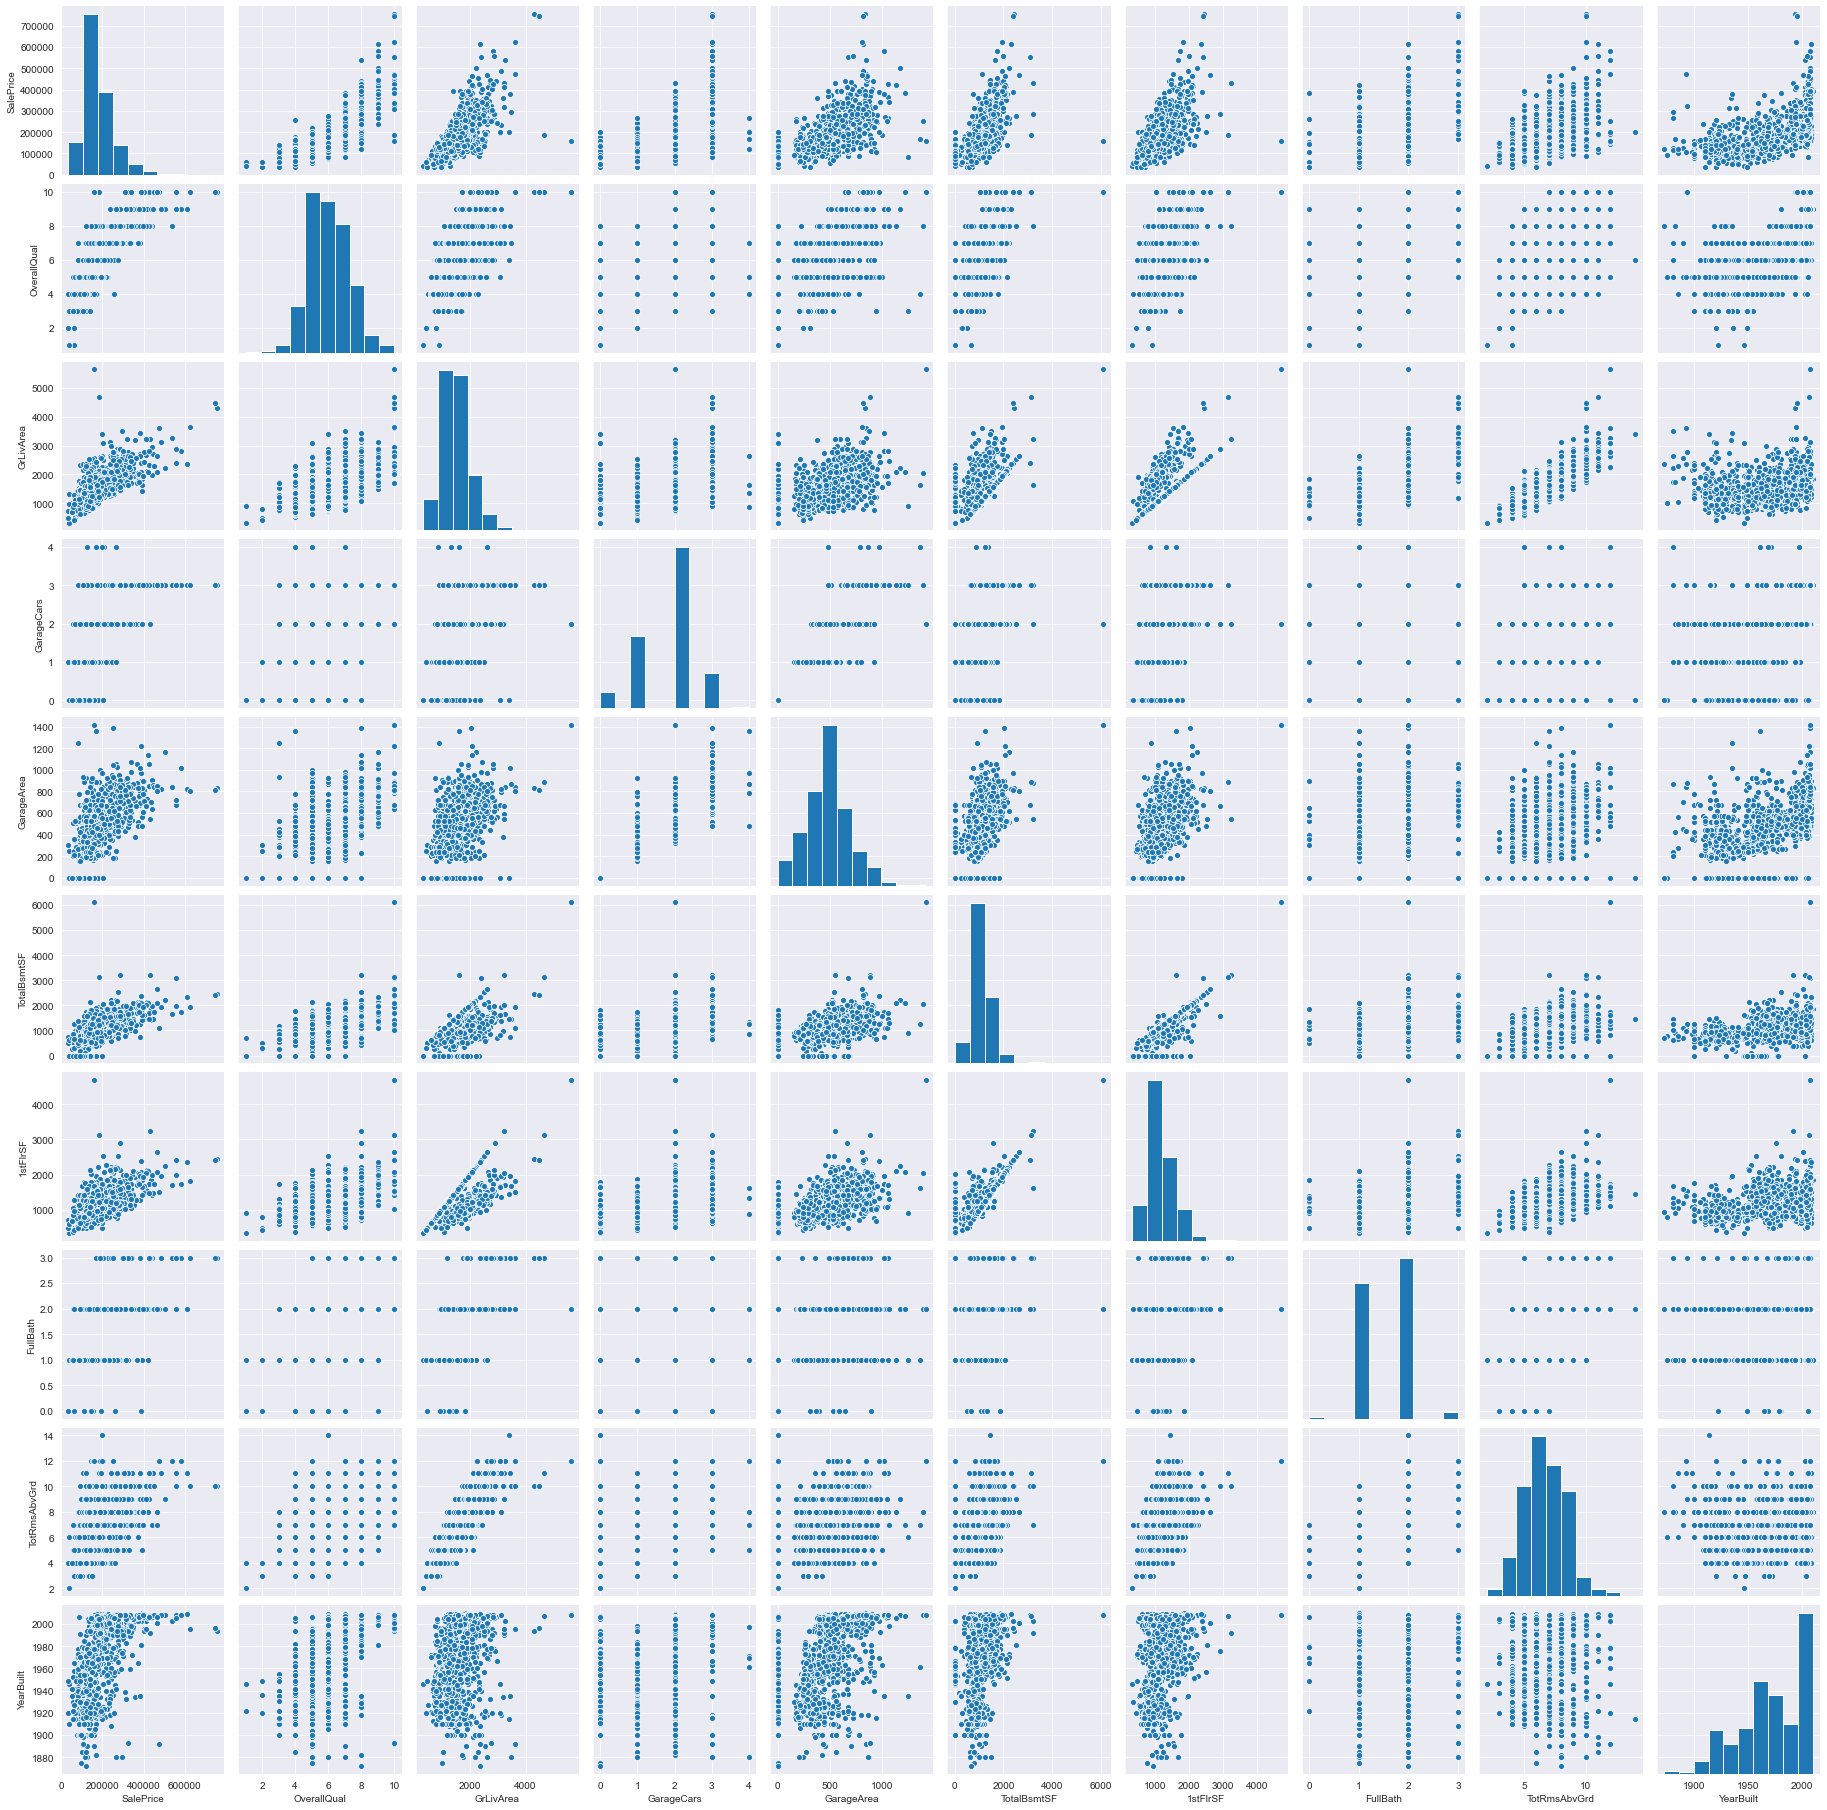

In [12]:
# visualize most correlated to "SalePrice" column features
sns.pairplot(train[most_corr])

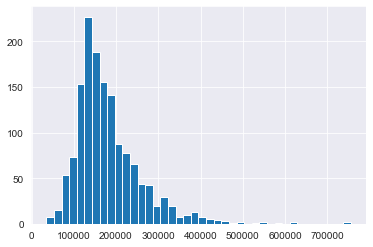

In [13]:
# "SalePrice" distribution
train["SalePrice"].hist(bins=40);

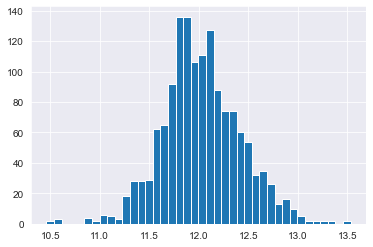

In [14]:
# Log of "SalePrice" distribution
np.log(train["SalePrice"]).hist(bins=40);

## So, here is what I have so far. 
## Datasets with different types of data and some of the columns have lots of missing values. I'll have to deal with that first. Some of the columns are highly correlated with the target column. The target itself is normally distributed. 

## Now, need to deal with missing values.

In [15]:
# percentage of data missing in both train and test datasets
nan_values = pd.concat([nan_values_train,nan_values_test], axis=1, keys=["Train","Test"])
nan_values

,Train,Test
Id,0.000000,0.000000
MSSubClass,0.000000,0.000000
MSZoning,0.000000,0.274160
LotFrontage,17.739726,15.558602
LotArea,0.000000,0.000000
...,...,...
MoSold,0.000000,0.000000
YrSold,0.000000,0.000000
SaleType,0.000000,0.068540
SaleCondition,0.000000,0.000000


## I want a list of columns where there are any missing values.

In [16]:
# list of columns
columns = list(train.columns)

# list of columns with values missing
nan_columns = []

# a for loop to fill in the list
for column in columns:
    if nan_values.loc[column]["Train"]!=0 or nan_values.loc[column]["Test"]!=0:
        nan_columns.append(column)

# how many columns with values missing        
len(nan_columns)        

35

## I have 35 columns with values missing.

## Now, I want to drop out all the columns with more than 50% values missing. And since we're at it, drop the "Id" column as well (no valueable information)

In [17]:
# I would need "Id" column from test set for submission
for_submission = test["Id"]

# list of columns to drop
columns_to_drop = ["Id"]

# if more than 50% of values missing in Train or Test sets, add the column to the list of columns to drop
# and remove that column from nan_values
for column in nan_columns:
    if nan_values.loc[column]["Train"]>50 or nan_values.loc[column]["Test"]>50:
        columns_to_drop.append(column)
        nan_columns.remove(column)
        
# drop those columns
train.drop(columns_to_drop, axis=1, inplace=True)
test.drop(columns_to_drop, axis=1, inplace=True)

In [18]:
# remove "SalePrice" for the list
nan_columns.remove("SalePrice")

## Now, fill in missing values with mean values in numerical columns and with most common term in categorical columns

In [19]:
# a for loop for that
for column in nan_columns:
    
    # if the column's data type is "object"
    if train[column].dtypes=="O":
        # put the most common term of the column instead of missing values
        train[column].fillna(train[column].value_counts().index[0], inplace=True)
        test[column].fillna(test[column].value_counts().index[0], inplace=True)
    # otherwise (column is numeric)
    else:
        # put mean value of the column instead of missing values
        train[column].fillna(train[column].mean(), inplace=True)
        test[column].fillna(test[column].mean(), inplace=True)

## Let's check and see if all the missing values are filled in

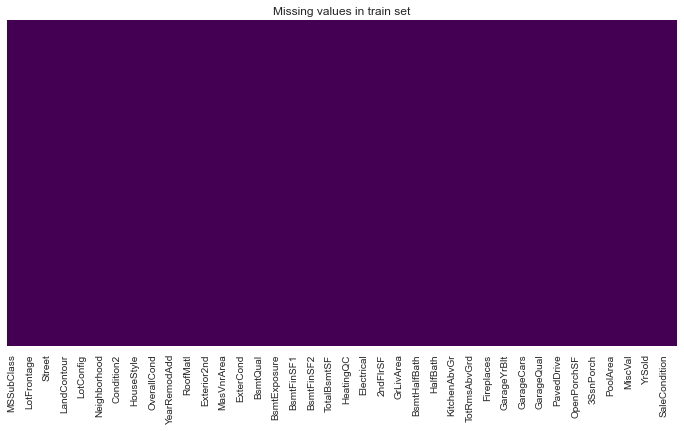

In [20]:
plt.figure(figsize = (12,6))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap="viridis")
plt.title("Missing values in train set");

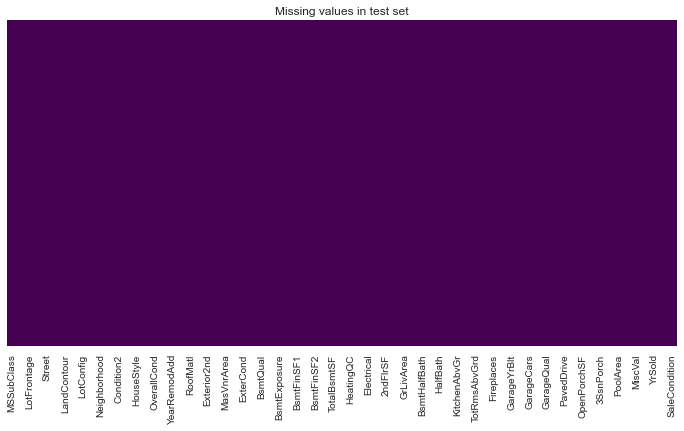

In [21]:
plt.figure(figsize = (12,6))
sns.heatmap(test.isnull(), yticklabels=False, cbar=False, cmap="viridis")
plt.title("Missing values in test set");

## All right, done with missing values!

## It's time for some feature engineering! (This part is inspired by Kamal Chouhbik notebook <a>https://github.com/chouhbik/Kaggle-House-Prices/blob/master/Kaggle-house-prices-KamalChouhbi.ipynb</a>)
## First, according to the graphs in the begining we can see that adding logarithm makes our target more normally distributed. Machine learning algorithms usually work better with normally distributed data so I'll create a new column "LogPrices" which I'm going to use as target for machine learning models later. 

In [22]:
train["LogPrice"] = np.log(train["SalePrice"])

## Also I want to combine some columns into new ones. For example, column "Square" would be made of "TotalBsmtSF", "1stFlrSF" and "2ndFlrSF" columns, etc.

In [23]:
# total sqaure of the house
train["square"]= train["TotalBsmtSF"] + train["1stFlrSF"] + train["2ndFlrSF"]

# number of bathrooms in the house
train["bathrooms"] = (train["FullBath"] + (0.5 * train["HalfBath"]) + train["BsmtFullBath"] + (0.5 * train["BsmtHalfBath"]))

# porch total square
train["porch_square"] = (train["OpenPorchSF"] + train["3SsnPorch"] + train["EnclosedPorch"] + train["ScreenPorch"] + 
                         train["WoodDeckSF"])


# total sqaure of the house
test["square"]=test["TotalBsmtSF"] + test["1stFlrSF"] + test["2ndFlrSF"]

# number of bathrooms in the house
test["bathrooms"] = (test["FullBath"] + (0.5 * test["HalfBath"]) + test["BsmtFullBath"] + (0.5 * test["BsmtHalfBath"]))

# porch total square
test["porch_square"] = (test["OpenPorchSF"] + test["3SsnPorch"] + test["EnclosedPorch"] + test["ScreenPorch"] + 
                        test["WoodDeckSF"])

## And several other columns. For example, "pool" column with 0s if there is 0 in "PoolArea" column and 1s if there is any pool, etc.

In [24]:
# for pool
train["pool"] = train["PoolArea"].apply(lambda x: 0 if x==0 else 1)

# for second floor
train["second_floor"] = train["2ndFlrSF"].apply(lambda x: 0 if x==0 else 1)

# for garage
train["garage"] = train["GarageArea"].apply(lambda x: 0 if x==0 else 1)

# for basement
train["basement"] = train["TotalBsmtSF"].apply(lambda x: 0 if x==0 else 1)

# for fireplace
train["fireplace"] = train["Fireplaces"].apply(lambda x: 0 if x==0 else 1)



# for pool
test["pool"] = train["PoolArea"].apply(lambda x: 0 if x==0 else 1)

# for second floor
test["second_floor"] = train["2ndFlrSF"].apply(lambda x: 0 if x==0 else 1)

# for garage
test["garage"] = train["GarageArea"].apply(lambda x: 0 if x==0 else 1)

# for basement
test["basement"] = train["TotalBsmtSF"].apply(lambda x: 0 if x==0 else 1)

# for fireplace
test["fireplace"] = train["Fireplaces"].apply(lambda x: 0 if x==0 else 1)



# now drop redundant columns
train.drop(["TotalBsmtSF","1stFlrSF","2ndFlrSF","FullBath","HalfBath","BsmtFullBath","BsmtHalfBath","PoolArea","GarageArea",
           "OpenPorchSF","3SsnPorch","EnclosedPorch","ScreenPorch","WoodDeckSF","Fireplaces"], axis=1, inplace=True)
test.drop(["TotalBsmtSF","1stFlrSF","2ndFlrSF","FullBath","HalfBath","BsmtFullBath","BsmtHalfBath","PoolArea","GarageArea",
           "OpenPorchSF","3SsnPorch","EnclosedPorch","ScreenPorch","WoodDeckSF","Fireplaces"], axis=1, inplace=True)

## OK, I think this is it for visualizing and preprocessing. Time to move to machine learning.
## I want to use cross validation with linear regression, lasso, ridge, random forest regressor and extreme gradient boosting regressor. Root mean squared error will be used as evaluation metric. Top two models will be tunned with grid search and the best result submitted to kaggle.com

In [25]:
# imports and variables for machine learning

# labeling and scaling
from sklearn.preprocessing import LabelEncoder, StandardScaler

# cross validation
from sklearn.model_selection import cross_val_score

# evaluation
from sklearn.metrics import mean_squared_error

# linear regression, lasso and ridge
from sklearn.linear_model import LinearRegression, Lasso, Ridge
linear = LinearRegression()
lasso = Lasso()
ridge = Ridge()

# random forest regressor
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

# XGBRegressor
from xgboost import XGBRegressor
xgbr = XGBRegressor()

# grid search
from sklearn.model_selection import GridSearchCV

In [26]:
# data preparation
X = train.drop(["SalePrice","LogPrice"], axis=1)
y = train["LogPrice"]
test_copy = test.copy() # just in case

In [27]:
# labeling

columns = list(X.columns) # list of features

for column in columns:
    if X[column].dtypes=="O":
        X[column] = LabelEncoder().fit_transform(X[column])
        test[column] = LabelEncoder().fit_transform(test[column])

In [28]:
# scaling
scaler = StandardScaler().fit(X)
X = scaler.transform(X)
test = scaler.transform(test)

In [29]:
# a dictionary of models and variables
models = {"Linear regression":linear,
         "Lasso":lasso,
         "Ridge":ridge,
         "Random forest regressor":rfr,
         "XGBRegressor":xgbr}


# a for loop to train and evaluate models
for label,model in models.items():
    print(f"RMSE for {label} is {np.sqrt(-1*cross_val_score(model, X,y, cv=10, scoring='neg_mean_squared_error').mean())}")

RMSE for Linear regression is nan
RMSE for Lasso is 0.39957101172715537
RMSE for Ridge is 0.1519609688169236
RMSE for Random forest regressor is 0.13962541279039262
RMSE for XGBRegressor is 0.13205730731704657


## Well, I'm really sure what happened to linear regression there but, anyway, the best two are XGBRegressor and Random forest regressor. Now, I'll be using grid search trying to tune them a bit hoping it will improve the result while NOT taking too much time! (Spoiler alert: Random forest WILL take a lot of time!)

In [39]:
# start with XGBRegressor
params = {"n_estimators":[100,300,500,1000],
         "learning_rate":[1,0.1,0.01,0.001],
         "gamma":[1, 0.1, 0.01, 0.001, 0.0001],
         "max_depth":range(3,10),
         "min_child_weight":range(1,7)}

xgbr_grid = GridSearchCV(XGBRegressor(booster="gbtree"), param_grid=params,
                        cv=5, scoring='neg_mean_squared_error')
xgbr_grid.fit(X,y)

print(f"Best score is {xgbr_grid.best_score_}")
print(f"Best parameters are {xgbr_grid.best_params_}")
print(f"RMSE is {np.sqrt(-1*xgbr_grid.best_score_)}")

Best score is -0.014839597160923302
Best parameters are {'gamma': 0.0001, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 2, 'n_estimators': 500}
RMSE is 0.12181788522595235


## We've got a slight improvement! Let's see what happens with random forest regressor.

In [40]:
# and random forest regressor
params = {"n_estimators":[100,300,500,1000],
         "criterion":["mse","mae"],
         "max_depth":range(3,10),
         "min_samples_split":[2,4,6],
         "min_samples_leaf":range(1,6)}


rfr_grid = GridSearchCV(RandomForestRegressor(), param_grid=params,
                       cv=5, scoring='neg_mean_squared_error')

rfr_grid.fit(X,y)

print(f"Best score is {rfr_grid.best_score_}")
print(f"Best parameters are {rfr_grid.best_params_}")
print(f"RMSE is {np.sqrt(-1*rfr_grid.best_score_)}")

Best score is -0.0198152472130051
Best parameters are {'criterion': 'mse', 'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
RMSE is 0.14076664098075617


## OK, it seems it's gotten worse. Well then, I'll use XGBRegressor with optimal parameters and submit the result.

In [30]:
# model with optimal parameters
opt_xgbr = XGBRegressor(booster="gbtree", gamma=0.0001, learning_rate=0.1, max_depth=5, min_child_weight=2, n_estimators=500)

# train the model
opt_xgbr.fit(X,y)

# predicted log prices
log_prices = opt_xgbr.predict(test)

# predicted prices
pred_prices = pd.DataFrame(data=np.exp(log_prices), columns=["SalePrice"])

# dataframe to submit
submission = pd.concat([for_submission, pred_prices], axis=1)

# into .csv file
submission.to_csv("submission.csv", index=False)

# The file was submitted to kaggle.com and scored 0.12935!
### Any comments and ideas are welcome!